# Project Objective
### IBM Watson Marketing Customer

The IBM-Watson Marketing Customer dataset contains the results of an insurance company to keep customers, offering those customers with their expired plans, policies between 4 different renewal plans.Unfortunately the purchase response rates to the offers have been low with most renewals denied. If customers who denied their proposal received one of the other 3 proposals would their response been different?

The main objective of this analysis will try to answer that question by creating a predictive model that will attempt to pair the customer with the one of four renewal proposals that has the highest probability of being accepted. Along the way, this analysis will also explore the data for insights about the customers that could lead to better customer retention.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
%matplotlib inline
from plotnine import *
from mizani.formatters import percent_format

import warnings
warnings.filterwarnings("ignore")

# Association Rules Mining
#from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import apriori, association_rules

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# pip install plotnine --user

### Data information

The data has 9134 customer records with 24 features, being 10 customer profile (like gender and marital status) and 14 policy profile variables. The data correspond to user policies that expired on the dates between 01/01/2011 and 02/28/2011.

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://raw.githubusercontent.com/lucascooelho/MLbusiness_CA1/main/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

## EDA

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,Suburban,Single,77,3,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [6]:
df.describe(include='all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,LV57595,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Columns Definitions  (Acho que pra ficar mais objetivo podemos fazer igual àquele modelo que o professor postou e colocar no apêndice)

##### Customer Variables

Costumer: Customer Identification.

State: State of residence ('Washington' 'Arizona' 'Nevada' 'California' 'Oregon').

Education: Education Level ('Bachelor' 'College' 'Master' 'High School or Below' 'Doctor').

Effective To Date: Policy expired date.

Employment Status: ('Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired').

Gender: Costumer Gender ('Female' or 'Male').

Income: Annual income.

Location Code: Costumer location code ('Suburban' 'Rural' 'Urban')

Marital Status: Relationship status ('Married' 'Single' 'Divorced')

Vehicle Class: Costumer vehicle type ('Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car' 'Luxury Car')

Vehicle Size: Costumer vehicle size ('Medsize' 'Small' 'Large')

##### Policy Variables

Customer Lifetime Value: measure of the average customer's revenue generated over their entire relationship with a company.

Response: Response to a renewal offer ('Yes' 'No')

Coverage: Policy type ('Basic' 'Extended' 'Premium')

Monthly Premium Auto: Customers' monthly amount of insurance payments.

Months Since Last Claim: Number of months between customers' last reported insurance claim.

Months Since Policy Inception: Number of months since customer began an insurance policy.

Number of Open Complaints: Number of unresolved customer complaints.

Number of Policies: Number of policies customer currently owns.

Policy Type: Different types of policies ('Corporate Auto' 'Personal Auto' 'Special Auto').

Policy: 3 levels (L1, L2, L3) per Policy Type ('Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3').

Renew Offer Type: 4 types of renewal offers ('Offer1' 'Offer3' 'Offer2' 'Offer4').

Sales Channel: Channels for purchasing a policy ('Agent' 'Call Center' 'Web' 'Branch').

Total Claim Amount: Cumulative number of claims since the start of the policy

In [8]:
df.isna().any()

Customer                         False
State                            False
Customer Lifetime Value          False
Response                         False
Coverage                         False
Education                        False
Effective To Date                False
EmploymentStatus                 False
Gender                           False
Income                           False
Location Code                    False
Marital Status                   False
Monthly Premium Auto             False
Months Since Last Claim          False
Months Since Policy Inception    False
Number of Open Complaints        False
Number of Policies               False
Policy Type                      False
Policy                           False
Renew Offer Type                 False
Sales Channel                    False
Total Claim Amount               False
Vehicle Class                    False
Vehicle Size                     False
dtype: bool

Checked if the dataset contains any missing values, it is possible to see that there is no missing value, which would be represented by True if there was or False.

Then, the unique values for each categorical column of the dataset were verified, going through column by column.

In [9]:
for column in df.columns:
    if df[column].dtypes == 'object':
        print(column, df[column].unique())

Customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
State ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Response ['No' 'Yes']
Coverage ['Basic' 'Extended' 'Premium']
Education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Effective To Date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
EmploymentStatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender ['F' 'M']
Location Code ['Suburban' 'Rur

Conversion of column 'Effective To Date' to datetime type.

In [10]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [11]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Discretizing data essentially transforms continuous data into categorical data through the process of placing a range of values into a defined bucket or bin. The following variables were discretized with results placed into new columns. See code for bin definitions.

In [12]:
# Add Income bins as new column
bins = [-1,14999,29999,44999,59999,74999,np.inf]
labels = ["< $15000", "$15000-29999","$30000-44999", "$45000-59999", "$60000-74999", "$75000+"]
df['IncomeBin'] = pd.cut(df['Income'], bins=bins, labels=labels)

# Add Customer Lifetime Value (CLV) bins as a new column
bins = [-1,1999,3999,5999,7999,9999,np.inf]
labels = ["< $2000", "$2000-3999", "$4000-5999", "$6000-7999", "$8000-9999", "$10000+"]
df['CLVBin'] = pd.cut(df['Customer Lifetime Value'], bins=bins, labels=labels)

# Add Monthly Auto bins as a new column
bins = [-1,74,99,124,149,np.inf]
labels = ["< $75", "$75-99","$100-124","$125-149","$150+"]
df['PremiumBin'] = pd.cut(df['Monthly Premium Auto'], bins=bins, labels=labels)

# Add Total Claim Amount bins as a new column
bins = [0,249,499,749,999,np.inf]
labels = ["< $250", "$250-499","$500-749","$750-999","$1000+"]
df['ClaimBin'] = pd.cut(df['Total Claim Amount'], bins=bins, labels=labels)

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,IncomeBin,CLVBin,PremiumBin,ClaimBin
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,$45000-59999,$2000-3999,< $75,$250-499
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,< $15000,$6000-7999,$75-99,$1000+
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,$45000-59999,$10000+,$100-124,$500-749
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,< $15000,$6000-7999,$100-124,$500-749
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,$30000-44999,$2000-3999,< $75,< $250


Adding a function to create the barplot, two parameters are received, being the ax and the percent, if percent is green, the graph will represent the percentage of data used to generate the bars, otherwise the number of exact data used. Other settings are also defined in this function, as font color, size, labels positions and their rotations.

In [13]:
# function to add data to plot
def create_countplot(ax, percent):                                   
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if (percent):
        for p in ax.patches:
             ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=12, color='black', rotation=0, xytext=(0, 10),
             textcoords='offset points')
    else:
        for p in ax.patches:
            ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

## Data Visualisation

Next, the data visualsation of the variables will be discussed, to better understand how the data behaves in a visual way. Some variables will have a greater focus than others as they are considered more important for the design analysis, they will also be combined with each other and demonstrated visually in graphs and plots.

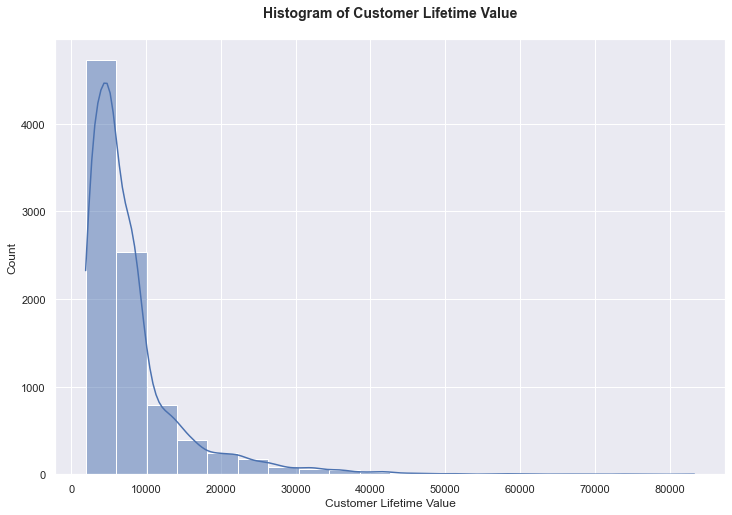

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(df['Customer Lifetime Value'], kde=True, bins=20)
plt.title('Histogram of Customer Lifetime Value\n', fontsize=14, fontweight='bold');

Customer Lifetime Values (CLV) ranges from 1898 to 83325 with a median of 5780 and a standard deviation of 6871. The mean CLV of 8005 is greater than the median indicating a right skewed distribution with a decreasing number of customers as CLV increases.

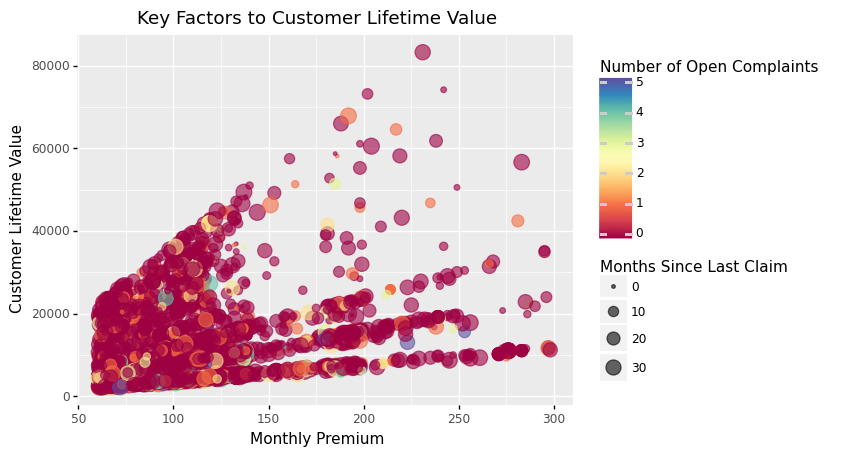

<ggplot: (8785164109216)>

In [15]:
# Plot scatterplot between CLV and Monthly Premium 
# along with Number of Open Complaints and Months Since Last Claim

# Stephanny
ggplot(df, aes(x='Monthly Premium Auto', y='Customer Lifetime Value')) +\
geom_point(aes(color = 'Number of Open Complaints', size = 'Months Since Last Claim'),alpha = 0.6) +\
scale_colour_cmap(cmap_name="Spectral", name = "Number of Open Complaints") + xlab("Monthly Premium") +\
ylab("Customer Lifetime Value") + ggtitle("Key Factors to Customer Lifetime Value")


<p style='color:red'><b>Acho que podemos excluir estes gráficos, não analisamos o CLV em si, então não faz muito sentido em mantê-los.</b></p>
Supposing a CLV greater than or equal to 20000 was defined as a "High CLV", Customers with higher monthly premiums and low open complaints (<3 depicted in the colors yellow, pink and red) and no recent claims (last claims > 20 months depicted by size of circle) would have a higher likelihood of falling in the "High CLV" definition.

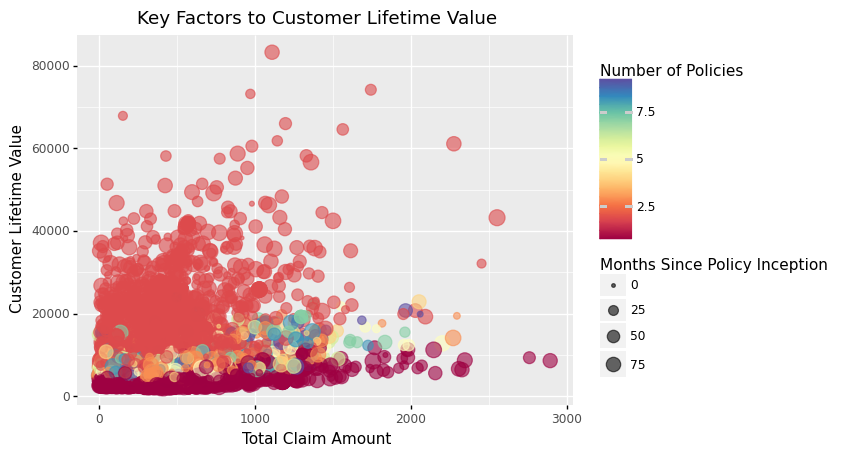

<ggplot: (8785184180375)>

In [16]:
ggplot(df, aes(x='Total Claim Amount', y='Customer Lifetime Value')) +\
geom_point(aes(color = 'Number of Policies', size = 'Months Since Policy Inception'), alpha = 0.6) +\
scale_colour_cmap(cmap_name="Spectral", name = "Number of Policies") + xlab("Total Claim Amount") +\
ylab("Customer Lifetime Value") + ggtitle("Key Factors to Customer Lifetime Value")


Under the same "High CLV" definition from previous graph, Customers with lower Total Claim Amounts with at least 2 policies and more than 25 months since policy inception would have a higher likelihood of falling in the "High CLV" definition.

# Customer Response

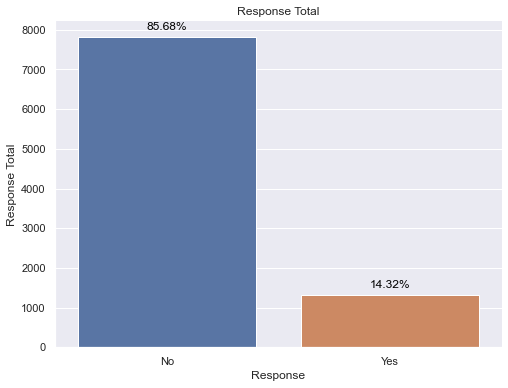

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot('Response', data = df)
plt.title('Response Total')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

It is possible to observe that 14.32% of customers responded to the call from the marketing sector, and the other 84.68% did not respond or were not interested.

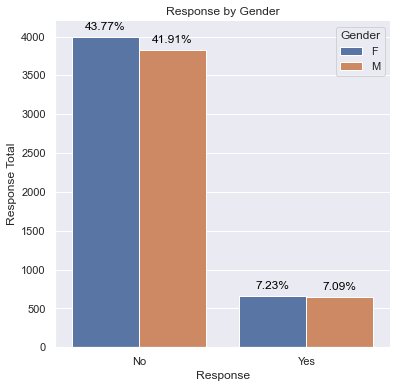

In [18]:
plt.figure(figsize=(6, 6))
ax = sns.countplot('Response', hue = 'Gender' ,data = df)
plt.title('Response by Gender')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

The percentage of females and males who responded to the marketing call are practically the same between 7.29% and 7.09%, whereas those who did not respond to the marketing call, 43.77% were females against 41.91% of males.

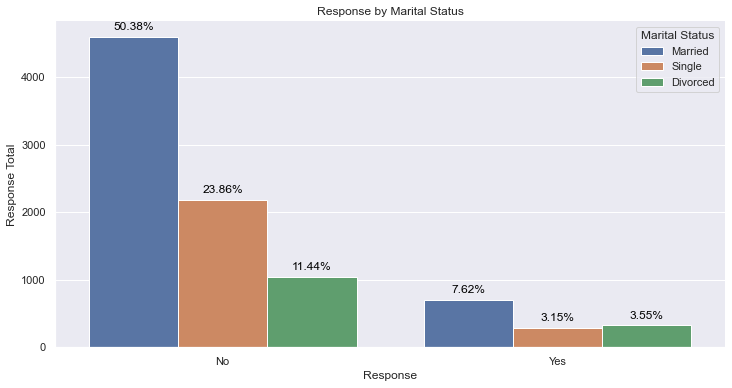

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.countplot('Response', hue = df['Marital Status'], data = df)
plt.title('Response by Marital Status')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

Note that the plot above shows the customers who answered or not the call, with 50.38% of those who did not answer are married, which is a little more than half of the data, against 7.62% of married people who answered.

### Response by Renew offer

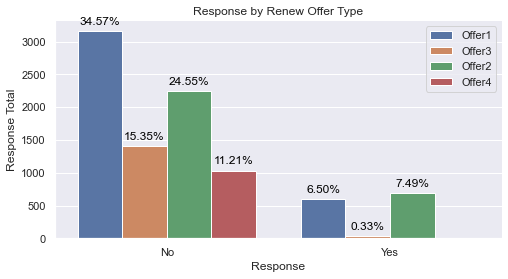

In [20]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response', hue = 'Renew Offer Type', data = df)
plt.title('Response by Renew Offer Type')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.legend(loc='upper right')

For the four types of offers, it is possible to see that the number of non-responses was quite high compared to those who responded. For Offer1 and Offer2 customers have responded to marketing calls, for Offer 3 and Offer 4 were almost no response.

### Response by Education

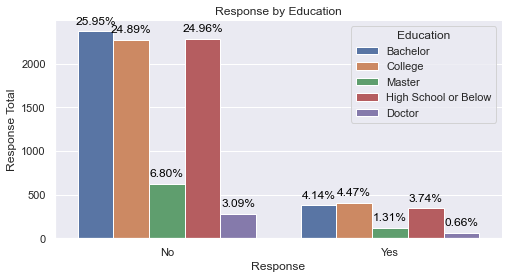

In [21]:
plt.figure(figsize=(8, 4))
ax = sns.countplot('Response' ,hue = 'Education' ,data = df)
plt.title('Response by Education')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

It is possible to observe that customers with Bachelor and High School or Below were the ones who most did not respond, whereas for those who responded are the ones with the College and Machelor level of education were the ones who most responded. It could be that younger customers are more interested in the product compared to older customers who have a higher level of education.

### Response by Sales Channel

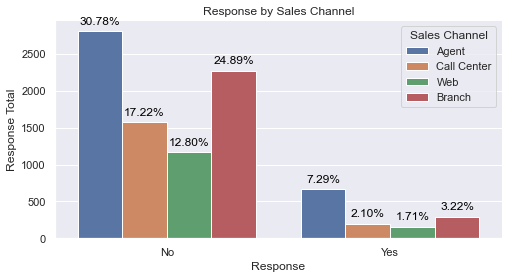

In [22]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response', hue = 'Sales Channel', data = df)
plt.title('Response by Sales Channel')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

Agent (30.78%) and Branch (24.89%) were the sales channels that had the highest rejected rate call, and for the same ones, they were the ones that had the most responses when contacting the customer, with 7.29% for Agent and 3.22% for Branch.

### Response rate by Total Claim Amount

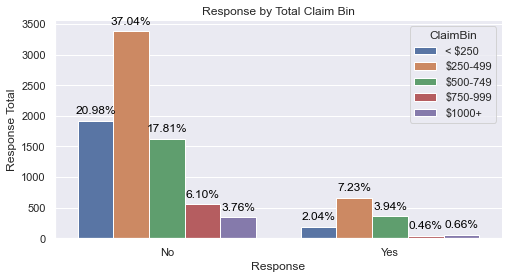

In [23]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response', hue = 'ClaimBin', data = df)
plt.title('Response by Total Claim Bin')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

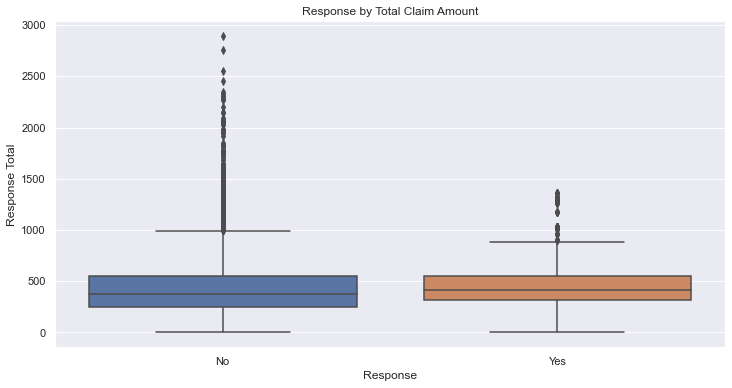

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = df)
plt.title('Response by Total Claim Amount')
plt.ylabel('Response Total')
plt.show()

The box graph shows the distribution of ongoing resources, such as the minimum and maximum, the first and third quartile, and the mean. The central rectangle extends from the first quartile to the third quartile, and the line shows the median. The lower and upper ends show the minimum and maximum for each distribution.

Points above the upper limit line show suspected outliers that are decided based on the Interquartile range (IQR). Points that fall 1.5 * IQR above the third quartile or 1.5 * IQR below the quartile are considered outliers and are drawn with the points.

### Response by Income Distributions

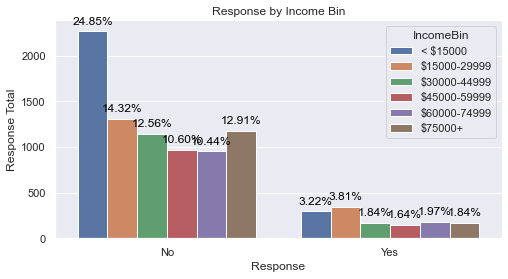

In [25]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response', hue = 'IncomeBin', data = df)
plt.title('Response by Income Bin')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

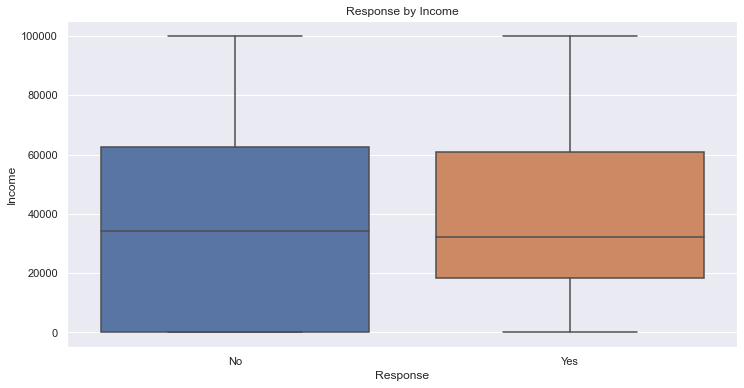

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = df)
plt.title('Response by Income')
plt.show()

### Response by Employment Status

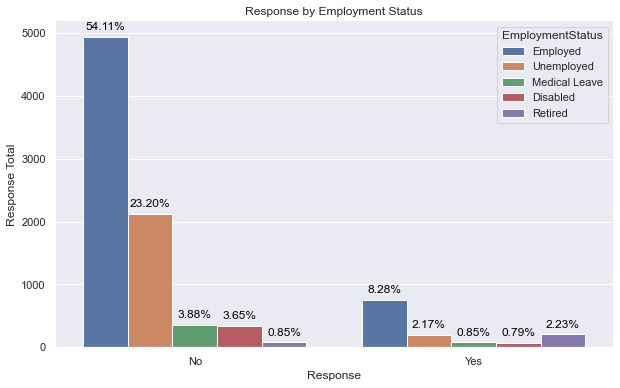

In [27]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response', hue = 'EmploymentStatus', data = df)
plt.title('Response by Employment Status')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

Observing the chart above, it is possible to see that for both Response, YES (54.11%) and NO (8.28%), the largest were Employed customers. The second biggest for No Response was Unemployed, which is clear to understand but comes third for those who said yes. It can also be observed that the second highest index of YES was from retirees (2.23%).

### Response by Vehicle Class

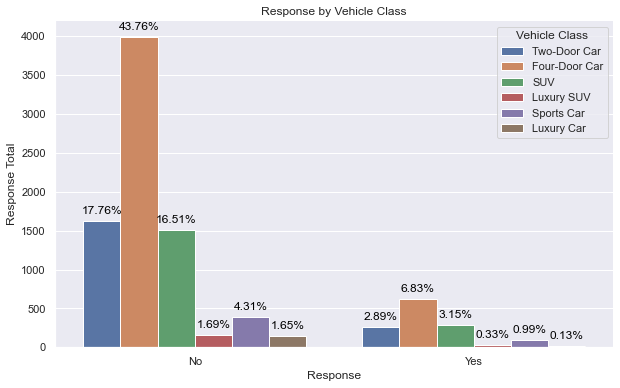

In [28]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response', hue = 'Vehicle Class', data = df)
plt.title('Response by Vehicle Class')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

Visualizing the Vehicle Class in relation to Responses, the highest index were Four-Door Car vehicles, which represents 43.76% of NO against 6.83%, the high number for both is linked to the fact that this vehicle class is the most common, so the numbers for this class are high compared to the others.
Sport Cars (17.76%) and SUV (16.51%) follow positions of those who did not respond to the call from the marketing sector. They are in second and third, second SUV (3.15%) and Sport Car (2.89%) for those who responded.

### Response by Policy

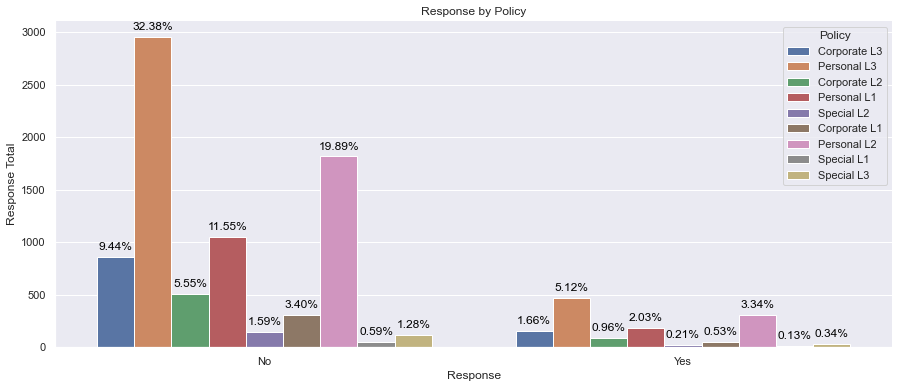

In [29]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Response', hue = 'Policy', data = df)
plt.title('Response by Policy')
plt.ylabel('Response Total')
create_countplot(ax, 1)
plt.show()

**Response Summary**

- Men and women were equally likely to answer "Yes".
- Divorced customers were slightly more likely to say "Yes" to an offer.
- Purchase response rates were roughly the same by state.
- Customers from suburban areas had a higher purchase response rate than rural or urban customers.
- Graduate clients are slightly more likely to accept the renewal offers they received.
- Nearly 75% or retired customers answered "Yes" to their renewal offers.
- Customers earning between 15,000-29,999 and 60,000-74,999 answered "Yes" to renewal offers slightly more often than customers in other income brackets.

The chart above shows the call response numbers for each Policy, which are different plans offered. Where 'Personal L3' stands out in both classes for Response, with 32.38% of the total data for NO and 5.12% for yes. In this graph it is possible to identify and perceive that the amount of YES is explicitly low in relation to NO.

### Number of Open Complaints by Gender

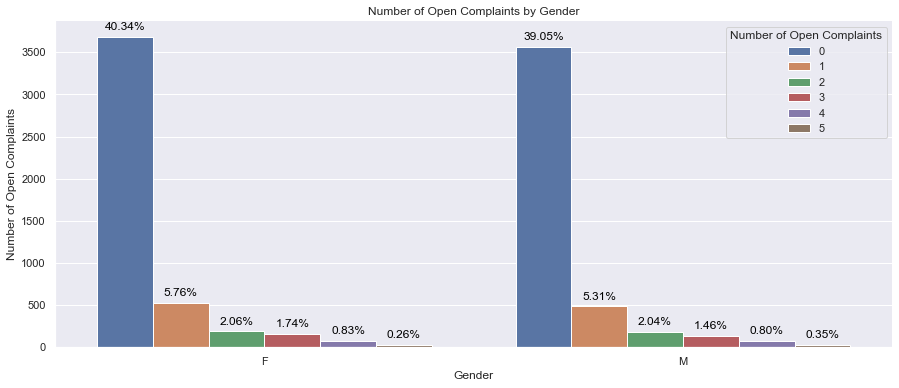

In [30]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Gender', hue = 'Number of Open Complaints', data = df)
plt.title('Number of Open Complaints by Gender')
plt.ylabel('Number of Open Complaints')
create_countplot(ax, 1)
plt.show()

The number of complaints was also shown, an index ranging from 0 to 5, showing the number of customer complaints divided by gender. The numbers present with 40.34% of the data, female clients did not register any complaints, followed by 39.05% males. And for customers who made 2 or more complaints, it reaches only 4.89% for each, less then 5%, which is considered low for the amount of data registered in the dataset.

### Customer Lifetime Value by Policy Type and Policy

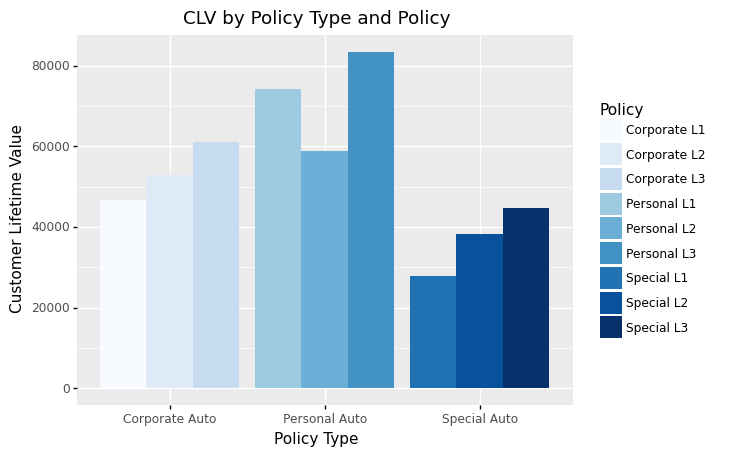

<ggplot: (8785164217640)>

In [31]:
CLV_PolicyType = ggplot(df, aes(x=df['Policy Type'], y=df['Customer Lifetime Value'], fill = df['Policy'] )) +\
geom_col(position = 'dodge') +\
xlab("Policy Type") + ylab("Customer Lifetime Value") +\
ggtitle("CLV by Policy Type and Policy") +\
scale_fill_brewer(palette = "Blues")

CLV_PolicyType

Identifying the CLV by Policy Type and Policy, it is possible to see that the Policy Type of 'Personal Auto' had the highest values in relation to the client's CLV, where the Policy of 'Personal L3' has a value above 80k, followed by 'Personal L1' around 70k. While the values for 'Special Auto' policy type had the lowest, being 'Special L1' with the lowest value, approximately 27k, followed by 'Special L2' with approximately 40k.

### Customer Lifetime Value by Vehicle Type and Vehicle Class

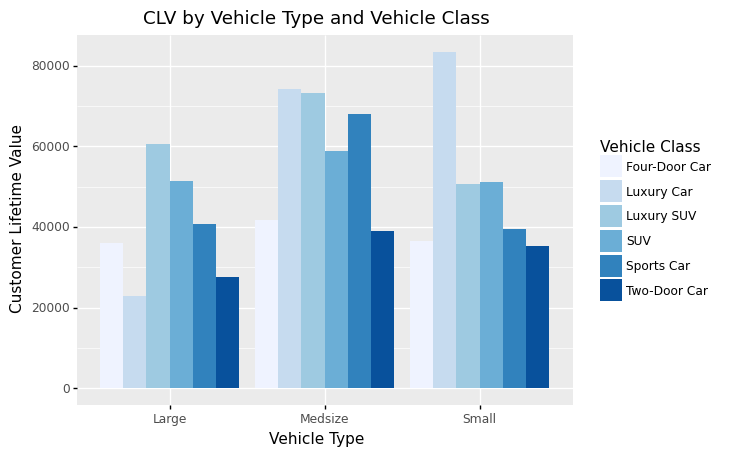

<ggplot: (8785164012171)>

In [32]:
# Plot CLV by Vehicle Type and Vehicle Class
CLV_Vehicle = ggplot(aes(x=df['Vehicle Size'], y=df['Customer Lifetime Value'], 
              fill = df['Vehicle Class'] )) + geom_col(position = 'dodge') + xlab("Vehicle Type") + ylab("Customer Lifetime Value") + ggtitle("CLV by Vehicle Type and Vehicle Class") + scale_fill_brewer(palette = "Blues")      
CLV_Vehicle

Viewing the customer's CVL by its Vehicle Type and Vehicle Class, it is possible to identify that the largest amount of customer data is registered with the Vehicle Type of 'Small' with over 80k in the Vehicle Class of 'Four-Door Car', while the smallest values are registered in the Vehicle Type of 'Large' with Vehicle Class 'Luxury Car' with a bit more than 20k, this relationship is possible to understand that the most common cars among customers are the small ones with four doors, while luxury cars are not so common.

### Customer Lifetime Value by State and Location Code

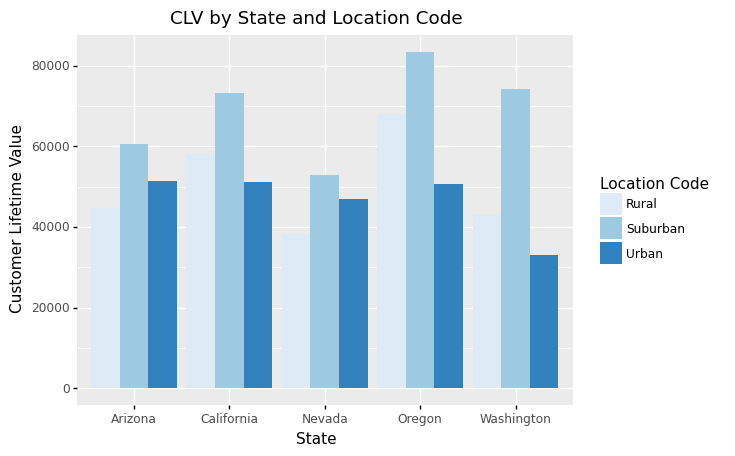

<ggplot: (8785164600275)>

In [33]:
# Plot CLV by State and Location Code
CLV_Region = ggplot(aes(x=df["State"], y=df['Customer Lifetime Value'],fill = df["Location Code"]))+\
geom_col(position = 'dodge') + xlab("State") + ylab("Customer Lifetime Value") +\
ggtitle("CLV by State and Location Code") + scale_fill_brewer(palette = "Blues")
CLV_Region

Looking at the graph above, it is possible to see that the state that presents the most data is Oregon in Surburbans with over 80k, and Washington is concentrated the least amount in the Urban area with approximately 37k. But compared to all of them, Oregon is the state with the most registration if considered the Location Code, and Nevada is the one with the lowest data concentration considering the 3 Location Codes all together.

### Customer Lifetime Value by Marital Status and Gender

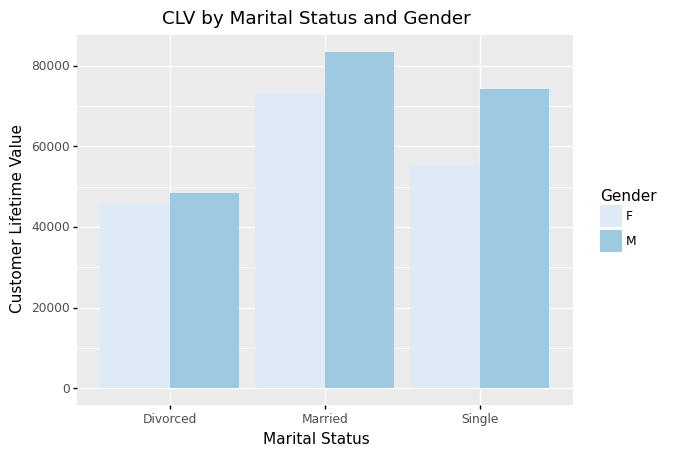

<ggplot: (8785164296575)>

In [34]:
# Plot CLV by Marital Status and Gender
CLV_Marital_Status = ggplot(aes(x=df['Marital Status'], y=df['Customer Lifetime Value'],
              fill = df['Gender'] )) + geom_col(position = 'dodge') + xlab("Marital Status") + ylab("Customer Lifetime Value") +\
ggtitle("CLV by Marital Status and Gender") + scale_fill_brewer(palette = "Blues")
CLV_Marital_Status

Analyzing the CLV of customers by their Marital Status and Gender, the chart shows that most of the data is around those who are married, and with the highest rate of them being male with a CLV above 80k. With the lowest data rate, customers who are divorced for both gender, having their CVL below 40k.

**CLV Summary**
- Strong and positive correlation between customer lifetime value, monthly premiums and total claims values.
- Customers with high monthly premiums, few open claims, and no recent claims tend to have a high CLV.
- Married customers with medium size cars and personal policies make up the majority of customers.
- Customers with low total claim amounts, at least 2 policies and more than 2 years of subscription tend to have high CLV.

### Renewal Offer Types by Policy Type

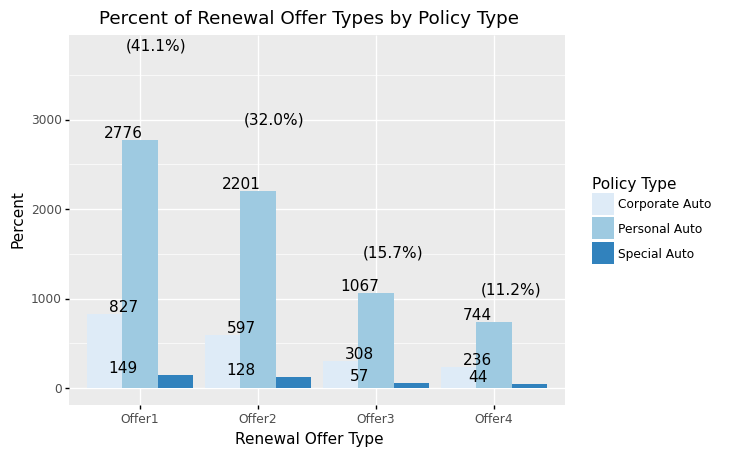

<ggplot: (8785184271839)>

In [35]:
# Plot Percent of Renew Offer Type by Policy Type
#ggplot(df, aes(x='Renew Offer Type', fill = 'Policy Type')) +\
#geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
#xlab("Renew Offer Type") + ylab("Percent") + ggtitle('Percent of Renewal Offer Types by Policy Types') +\
#scale_fill_brewer(palette = "YlOrRd", name = "Policy")

ggplot(df, aes('Renew Offer Type', fill = 'Policy Type')) + geom_bar(position= 'dodge')+\
xlab("Renewal Offer Type") + ylab("Percent") +\
ggtitle("Percent of Renewal Offer Types by Policy Type") + scale_fill_brewer(palette ="Blues", name='Policy Type') +\
geom_text(aes(label=after_stat('count')), stat='count', nudge_x=-0.14, nudge_y=0.125, va='bottom') +\
geom_text(aes(label=after_stat('prop*100'), group=1), stat='count', nudge_x=0.14, nudge_y=0.125, va='bottom', format_string='({:.1f}%)')

### Renew Offer Type by Gender

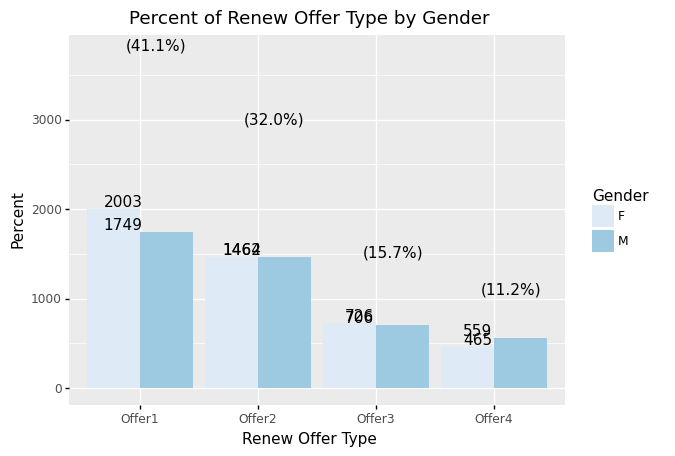

<ggplot: (8785164190269)>

In [36]:
# Plot percent of Renew Offer Type by Gender

#ggplot(df, aes(x= 'Renew Offer Type', fill='Gender')) + geom_bar(position = "fill") +\
#scale_y_continuous(labels = percent_format()) + xlab("Renew Offer Type") + ylab("Percent") +\
#xlab("Renew Offer Type") + ylab("Percent") +\
#ggtitle("Percent of Renew Offer Type by Gender") +\
#scale_fill_brewer(palette = "YlOrRd", name='Gender')

ggplot(df, aes(x= 'Renew Offer Type', fill='Gender')) + geom_bar(position = "dodge") +\
xlab("Renew Offer Type") + ylab("Percent") +\
ggtitle("Percent of Renew Offer Type by Gender") +\
scale_fill_brewer(palette = "Blues", name='Gender') +\
geom_text(aes(label=after_stat('count')), stat='count', nudge_x=-0.14, nudge_y=0.125, va='bottom') +\
geom_text(aes(label=after_stat('prop*100'), group=1), stat='count', nudge_x=0.14, nudge_y=0.125, va='bottom', format_string='({:.1f}%)')

### Renew Offer Type by Marital Status

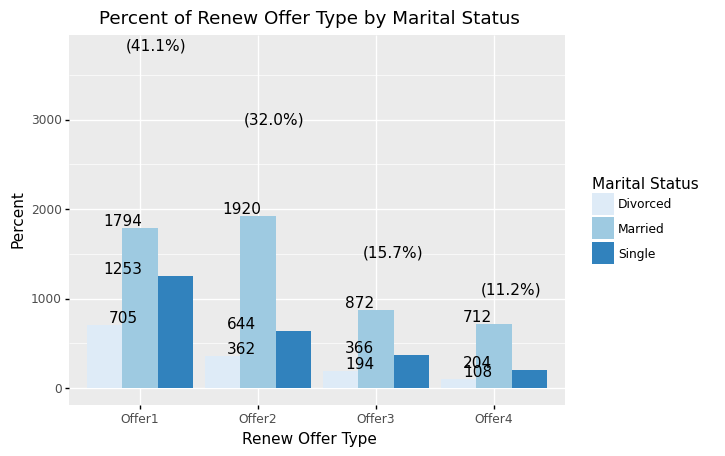

<ggplot: (8785184313125)>

In [37]:
# Plot percent of Renew Offer Type by Marital Status
#ggplot(df, aes(x='Renew Offer Type', fill = 'Marital Status')) +\
#geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
#xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Marital Status") +\
#scale_fill_brewer(palette = "YlOrRd", name = "Marital Status")

ggplot(df, aes(x='Renew Offer Type', fill = 'Marital Status')) +\
geom_bar(position = "dodge") +\
xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Marital Status") +\
scale_fill_brewer(palette = "Blues", name = "Marital Status") +\
geom_text(aes(label=after_stat('count')), stat='count', nudge_x=-0.14, nudge_y=0.125, va='bottom') +\
geom_text(aes(label=after_stat('prop*100'), group=1), stat='count', nudge_x=0.14, nudge_y=0.125, va='bottom', format_string='({:.1f}%)')

### Renew Offer Type by State

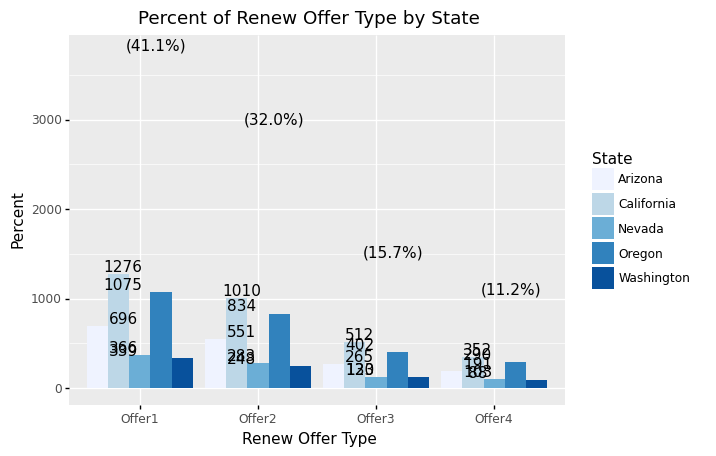

<ggplot: (8785184532270)>

In [38]:
# Plot percent of Renew Offer Type by State
#ggplot(df, aes(x='Renew Offer Type', fill = 'State')) +\
#geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
#xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by State") +\
#scale_fill_brewer(palette = "YlOrRd", name = "State")

ggplot(df, aes(x='Renew Offer Type', fill = 'State')) +\
geom_bar(position = "dodge") +\
xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by State") +\
scale_fill_brewer(palette = "Blues", name = "State") +\
geom_text(aes(label=after_stat('count')), stat='count', nudge_x=-0.14, nudge_y=0.125, va='bottom') +\
geom_text(aes(label=after_stat('prop*100'), group=1), stat='count', nudge_x=0.14, nudge_y=0.125, va='bottom', format_string='({:.1f}%)')

### Renew Offer Type by Location Code

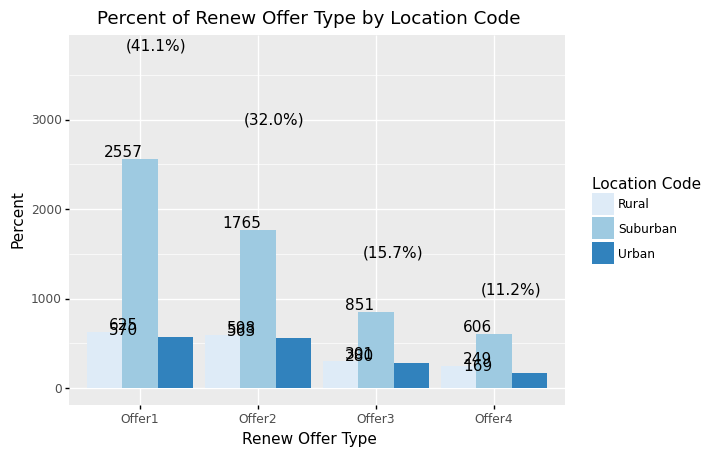

<ggplot: (8785163954920)>

In [39]:
# Plot percent of Renew Offer Type by Location Code
#ggplot(df, aes(x='Renew Offer Type', fill = 'Location Code')) +\
#geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
#xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Location Code") +\
#scale_fill_brewer(palette = "YlOrRd", name = "Location Code")

ggplot(df, aes(x='Renew Offer Type', fill = 'Location Code')) +\
geom_bar(position = "dodge") +\
xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Location Code") +\
scale_fill_brewer(palette = "Blues", name = "Location Code") +\
geom_text(aes(label=after_stat('count')), stat='count', nudge_x=-0.14, nudge_y=0.125, va='bottom') +\
geom_text(aes(label=after_stat('prop*100'), group=1), stat='count', nudge_x=0.14, nudge_y=0.125, va='bottom', format_string='({:.1f}%)')

### Renew Offer Type by Employment Status

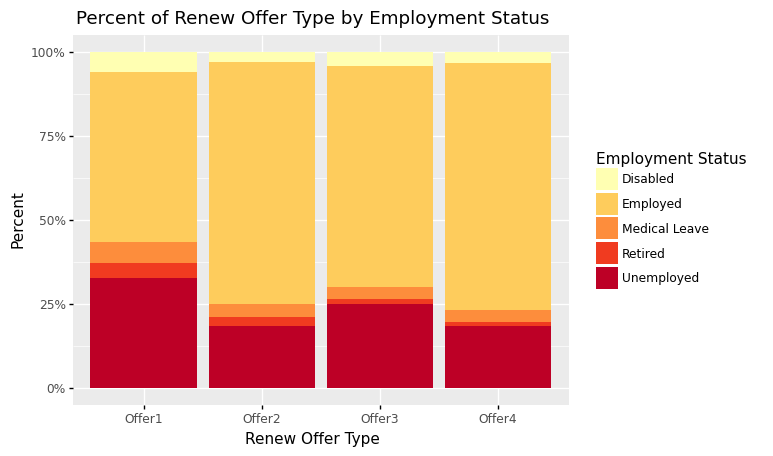

<ggplot: (8785164020312)>

In [40]:
# Plot percent of Renew Offer Type by Employment Status
ggplot(df, aes(x='Renew Offer Type', fill = 'EmploymentStatus')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Employment Status") +\
scale_fill_brewer(palette = "YlOrRd", name = "Employment Status")

#ggplot(df, aes(x='Renew Offer Type', fill = 'EmploymentStatus')) +\
#geom_bar(position = "dodge") +\
#xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Employment Status") +\
#scale_fill_brewer(palette = "Blues", name = "Employment Status") +\
#geom_text(aes(label=after_stat('count')), stat='count', nudge_x=-0.14, nudge_y=0.125, va='bottom', size = 6) +\
#geom_text(aes(label=after_stat('prop*100'), group=1), stat='count', nudge_x=0.14, nudge_y=0.125, va='bottom', format_string='({:.1f}%)')

### Renew Offer Type by Education

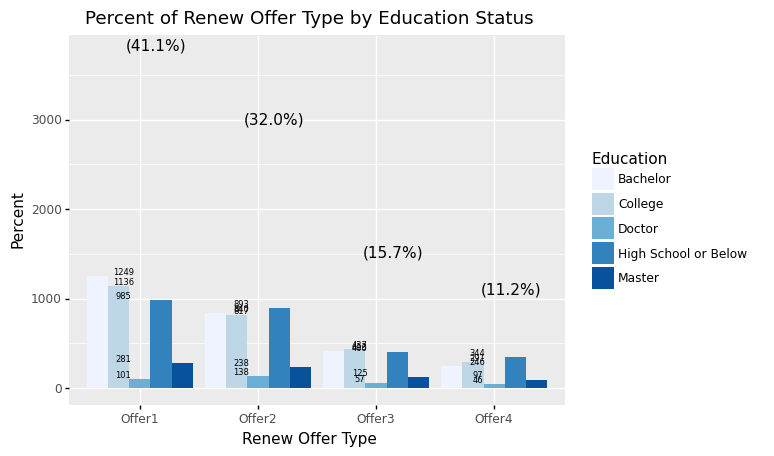

<ggplot: (8785146301230)>

In [41]:
# Plot percent of Renew Offer Type by Education
#ggplot(df, aes(x='Renew Offer Type', fill = 'Education')) +\
#geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
#xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Education Status") +\
#scale_fill_brewer(palette = "YlOrRd", name = "Education")

ggplot(df, aes(x='Renew Offer Type', fill = 'Education')) +\
geom_bar(position = "dodge") +\
xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Education Status") +\
scale_fill_brewer(palette = "Blues", name = "Education") +\
geom_text(aes(label=after_stat('count')), stat='count', nudge_x=-0.14, nudge_y=0.125, va='bottom', size = 6) +\
geom_text(aes(label=after_stat('prop*100'), group=1), stat='count', nudge_x=0.14, nudge_y=0.125, va='bottom', format_string='({:.1f}%)')

### Renew Offer Type by Income

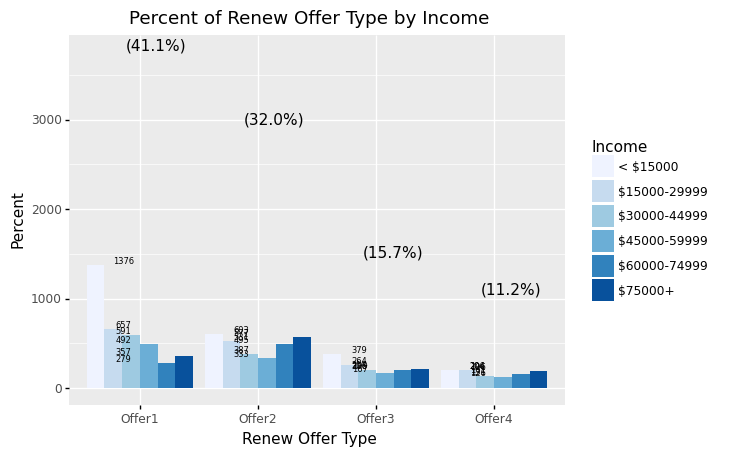

<ggplot: (8785164294346)>

In [42]:
# Plot percent of Renew Offer Type by Income
#ggplot(df, aes(x='Renew Offer Type', fill = 'IncomeBin')) +\
#geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
#xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Income") +\
#scale_fill_brewer(palette = 'YlOrRd', name = "Income")

ggplot(df, aes(x='Renew Offer Type', fill = 'IncomeBin')) +\
geom_bar(position = "dodge") +\
xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Income") +\
scale_fill_brewer(palette = "Blues", name = "Income") +\
geom_text(aes(label=after_stat('count')), stat='count', nudge_x=-0.14, nudge_y=0.125, va='bottom', size = 6) +\
geom_text(aes(label=after_stat('prop*100'), group=1), stat='count', nudge_x=0.14, nudge_y=0.125, va='bottom', format_string='({:.1f}%)')

The Renew Offers by Policy Type graph shows that the number of records for 'Offer1' with 41.1% has the highest number of records in the three Policy Type categories. 
- By Policy Type, with 2776 records for 'Personal Auto', 827 for 'Corporate Auto' 149 for 'Special Auto'. The 'Offer4' renew offer type presents the lowest volume for the three categories. 
- By identifying with gender, 2003 were female, against 1749 male from these 41% of the data.
- Marital Status identified that 'Offer1' matched 1794 records for married customers, 1253 for singles and 705 for divorced ones.
- By States, 'Offer1' had the most records in the state of California with 1276 followed by Oregon with 1075 and 696 in the state of Arizona.
- Location Code represented 'Offer1' with 2557 records for 'Suburbar', 625 for 'Rural' and 370 for 'Urbar'. The lowest being 'Offer4' scored 606 for 'Suburban', 249 for 'Rural' and finally 169 for 'Urban'.
- Employment Status registrou 1896 para Employed, 1229 para Unemployed.
- Education scored 1249 for Bachelor, 1136 for College, 985 for High School or Below, 281 for Maters and finally 101 for Doctor.
- Income < $15000 had records of 1376, for customers with Income between $15000 and $29999 it was 657, 591 for Income between $30000 and $ 44999, 492 for Income between $ 45000 and $ 59999, 357 for Income between $ 60000 and $ 74999, and finally 279 record for Income of $ 75000 or more.


**Renewal Offer Type Summary**
- Each customer of the three policy types received a single renewal offer type 1, 2, 3 or 4. Renewal offer types were not distributed to the same number of customers.

 - Approximately 41% of customers received Offer 1.
 - Approximately 32% of customers received Offer 2.
 - Approximately 16% of customers received Offer 3.
 - Approximately 11% of customers received Offer 4.

Interestingly, the offer types were distributed in almost equal proportions by policy type, gender, marital status, state and location code. There were small differences in the way the offers were distributed by level of education, with Offer 1 more distributed among undergraduate and bachelor's courses. Offer 1 was also received by a smaller proportion of employed customers compared to the other offer types. This difference was evident in income levels, as nearly 70% of Offer 1 recipients had incomes below 45,000 USD.

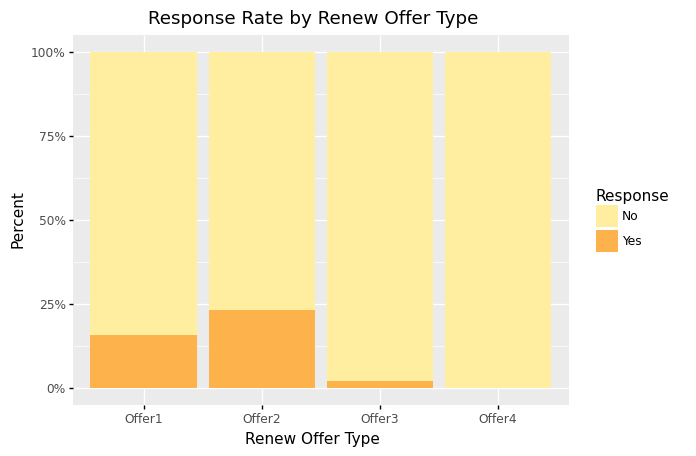

<ggplot: (8785164280058)>

In [43]:
# Plot Response Rate by Renew Offer Type
ggplot(df, aes(x='Renew Offer Type', fill = 'Response')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Renew Offer Type") + ylab("Percent") + ggtitle('Response Rate by Renew Offer Type') +\
scale_fill_brewer(palette = "YlOrRd", name = "Response")

#ggplot(df, aes(x='Renew Offer Type', fill = 'Response')) +\
#geom_bar(position = "dodge") +\
#xlab("Renew Offer Type") + ylab("Percent") + ggtitle('Response Rate by Renew Offer Type') +\
#scale_fill_brewer(palette = "YlOrRd", name = "Response")

The purchase response rates for the renew offers were very low.

* Offer 2 purchase response rate = 23.4%
* Offer 1 purchase response rate = 15.8%.
* Offer 3 purchase response rate = 2%
* Offer 4 purchase response rate = 0%.

In [44]:
copy = df
df = df.astype('object')
df.select_dtypes(include='object').nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
IncomeBin                           6
CLVBin                              6
PremiumBin  

## Preprocessing

To perform the first model, the categorical data was encoded and the data was standardised, as PCA will be applied.
Principal Component Analysis (PCA) was performed to reduce dimentionality, allowing to visualise the clusters created in a 2-D scatter plot.

In [45]:
# Getting the variables to create the model
to_be_clustered = df.drop(['Customer','Effective To Date', 'IncomeBin', 'CLVBin', 'PremiumBin', 'ClaimBin'],
                          axis=1)


# Encoding variables
columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code',
           'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
           'Vehicle Size']

labelEncoder = LabelEncoder()
for column in to_be_clustered[columns]:
    to_be_clustered[column] = labelEncoder.fit_transform(to_be_clustered[column]) 

In [46]:
# Standardising data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(to_be_clustered)

In [47]:
# Using PCA for dimentionality reduction
pca = PCA(n_components=2, random_state=123)
scaled_pca = pca.fit_transform(scaled_data)
scaled_pca.shape

(9134, 2)

In [48]:
pca.explained_variance_ratio_*100

array([11.0254842 ,  8.56483974])

## Customer Segmentation with K-Means

Costumer Segmentation will be performed to identify the groups of similar clients and their characteristics. Before applying the model, the optimal number of clusters will be checked to take the number of cluster with low Sum of Squared Distance (Elbow Curve) and high Silhouete score.

In [49]:
# Using the elbow method to find the optimal number of clusters

WCSS = []                               # Within Cluster Sum of Squares
Silhouette_scores = []
cluster = range(2,11)
for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=123)
    df_km = kmeans.fit(scaled_pca)
    score = silhouette_score(scaled_pca, kmeans.labels_)
    WCSS.append(df_km.inertia_)
    Silhouette_scores.append(score)

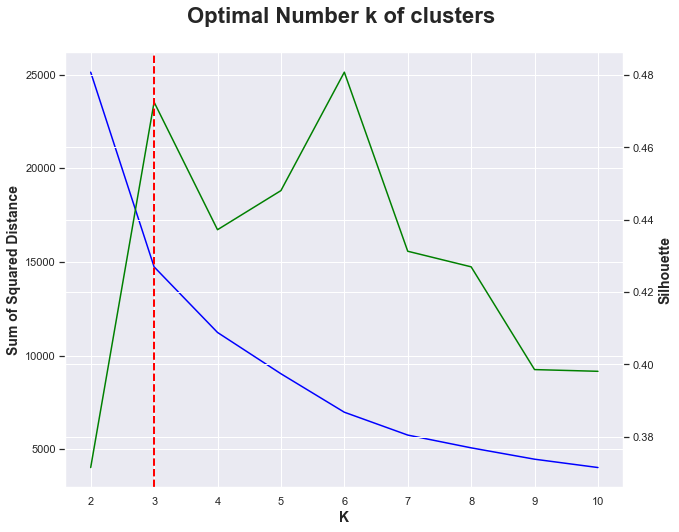

In [50]:
# Plotting the elbow curve
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(cluster, WCSS, color='blue')
ax.set_xlabel('K', fontsize=14, fontweight='bold')
ax.set_ylabel('Sum of Squared Distance', fontsize=14, fontweight='bold')

# Plotting the silhouette curve
ax2=ax.twinx()
ax2.plot(cluster, Silhouette_scores, color='green')
ax2.set_ylabel('Silhouette', fontsize=14, fontweight='bold')

plt.title('Optimal Number k of clusters \n', fontsize=22, fontweight='bold')
plt.axvline(3, color='red', linestyle='dashed', linewidth=2);


According to the plot above, the optimal number of clusters will be 3. The model will be applied and then the Principal Components will be used to plot the clusters.

In [51]:
# Applying KMeans to n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=123)
pred = kmeans.fit_predict(scaled_pca)

In [52]:
df['Cluster'] = pred

In [53]:
# Position of the centroids
kmeans.cluster_centers_

array([[ 1.81693459,  0.35719799],
       [-0.34373365, -2.28563174],
       [-0.88362488,  0.68965104]])

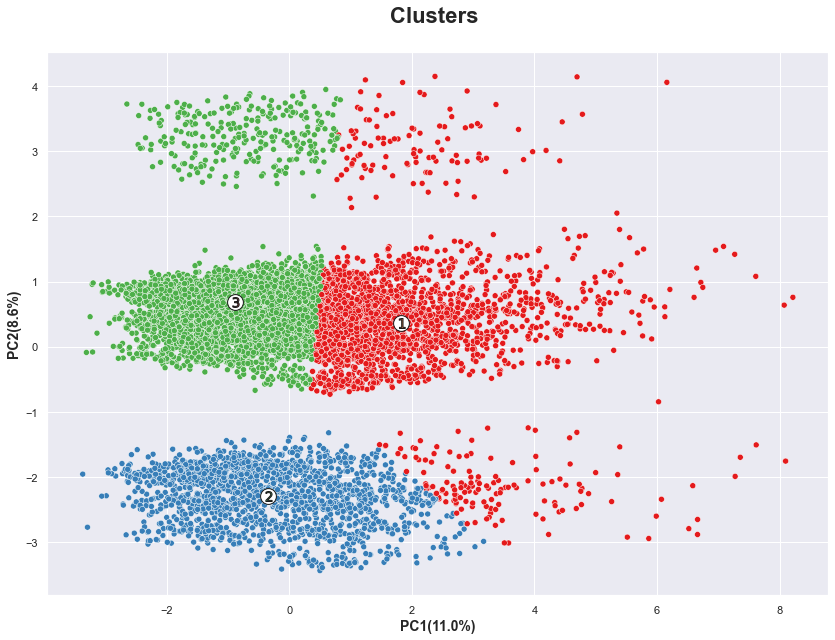

In [54]:
# Plotting the clusters with their respective centroids
plt.figure(figsize=(14,10))

sns.scatterplot(x=scaled_pca[:, 0],y=scaled_pca[:, 1], hue=pred, palette='Set1', legend=False)

# Plotting centroids and enumerating them
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='o',
            c="white", alpha=1, edgecolors='k')

for i, c in enumerate(kmeans.cluster_centers_):
    plt.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1, s=100, edgecolor='k')

plt.title('Clusters \n', fontsize=22, fontweight='bold')
plt.xlabel('PC1(11.0%)', fontsize=14, fontweight='bold')
plt.ylabel('PC2(8.6%)', fontsize=14, fontweight='bold');

On the graph above, it is possible to see the three different clusters with their centroids.

### Visualising Clusters Main Features

Understanding how the attributes influence each of the groups is the second part of the Customer Segmentation, because the goups will be defined by their similar characteristics. A few bar plots were displayed below and they will be analysed and a conclusion about the groups will be drawn.

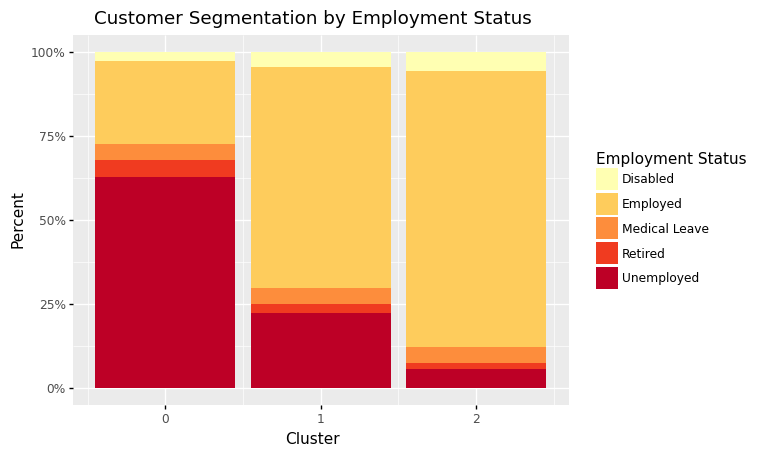

<ggplot: (8785146276858)>

In [55]:
ggplot(df, aes(x='Cluster', fill = 'EmploymentStatus')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Employment Status') +\
scale_fill_brewer(palette = "YlOrRd", name = "Employment Status")

* Cluster 0: Unemployed
* Cluster 1: Employed
* Cluster 2: Employed

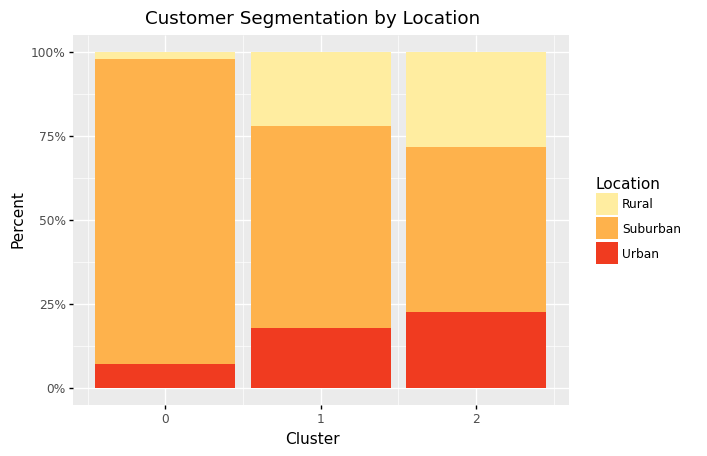

<ggplot: (8785165011188)>

In [56]:
ggplot(df, aes(x='Cluster', fill = 'Location Code')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Location') +\
scale_fill_brewer(palette = "YlOrRd", name = "Location")

* Cluster 0: Suburban
* Cluster 1: Suburban
* Cluster 2: Suburban and Rural

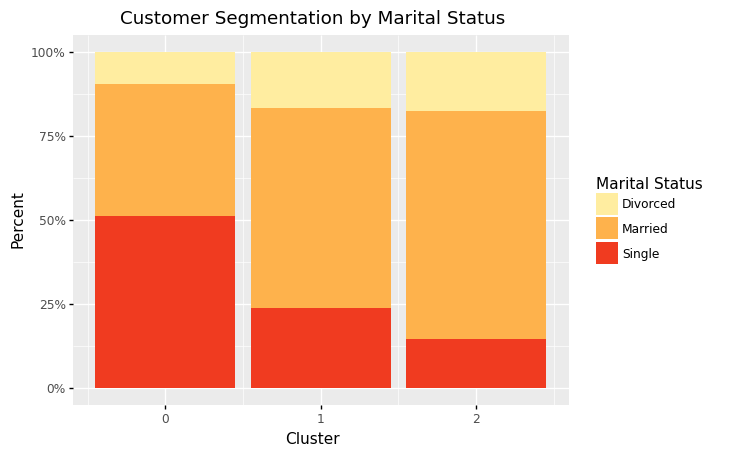

<ggplot: (8785146281578)>

In [57]:
ggplot(df, aes(x='Cluster', fill = 'Marital Status')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Marital Status') +\
scale_fill_brewer(palette = "YlOrRd", name = "Marital Status")


* Cluster 0: Single and Married
* Cluster 1: Married and Single
* Cluster 2: Married

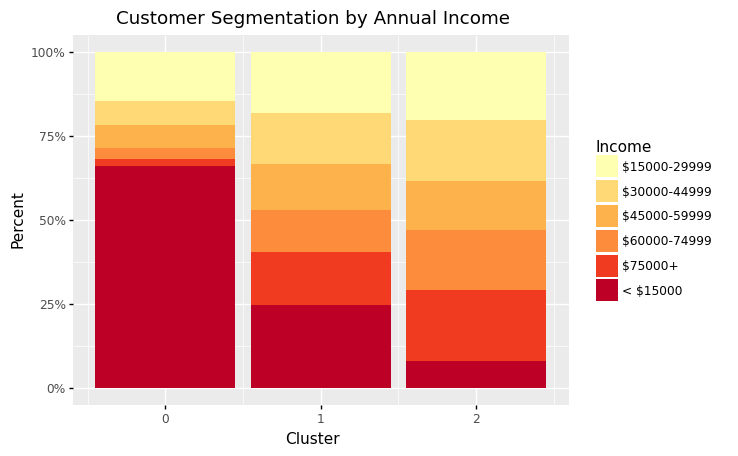

<ggplot: (8785184673353)>

In [58]:
ggplot(df, aes(x='Cluster', fill = 'IncomeBin')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Annual Income') +\
scale_fill_brewer(palette = "YlOrRd", name = "Income")

* Cluster 0: - 15000
* Cluster 1: - 15000, 15000-29999
* Cluster 2: 75000+, 60000-74999, 15000-29999

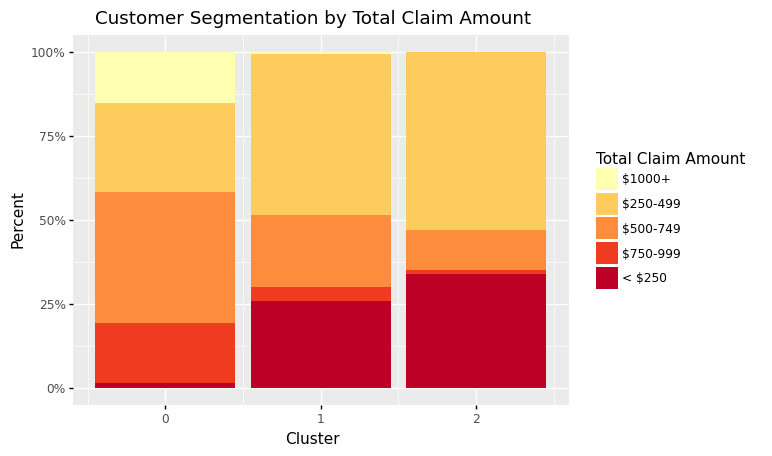

<ggplot: (8785146360330)>

In [59]:
ggplot(df, aes(x='Cluster', fill = 'ClaimBin')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Total Claim Amount') +\
scale_fill_brewer(palette = "YlOrRd", name = "Total Claim Amount")

plt.figure(figsize=(14, 8))
ax = sns.countplot('Cluster', hue = 'IncomeBin' ,data = df)
plt.title('Customer Segments by Annual Income')
plt.ylabel('Count')
create_countplot(ax, 1)
plt.show()

* Cluster 0: 250-499, 500-749
* Cluster 1: 250-499, -250, 500-749
* Cluster 2: 250-499, -250

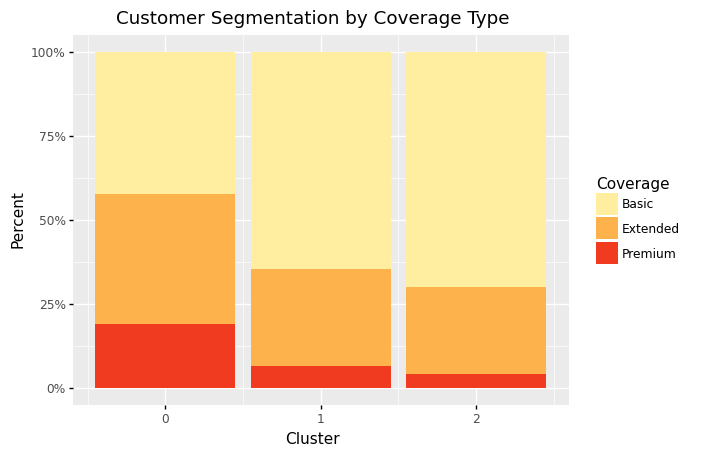

<ggplot: (8785185392433)>

In [60]:
ggplot(df, aes(x='Cluster', fill = 'Coverage')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Coverage Type') +\
scale_fill_brewer(palette = "YlOrRd", name = "Coverage")

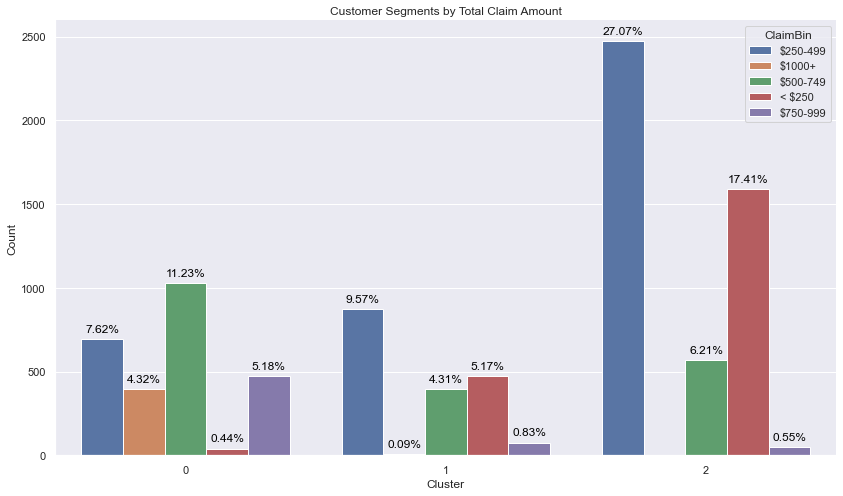

In [61]:
plt.figure(figsize=(14, 8))
ax = sns.countplot('Cluster', hue = 'ClaimBin' ,data = df)
plt.title('Customer Segments by Total Claim Amount')
plt.ylabel('Count')
create_countplot(ax, 1)
plt.show()

* Cluster 0: Basic, Extended
* Cluster 1: Basic, Extended
* Cluster 2: Basic

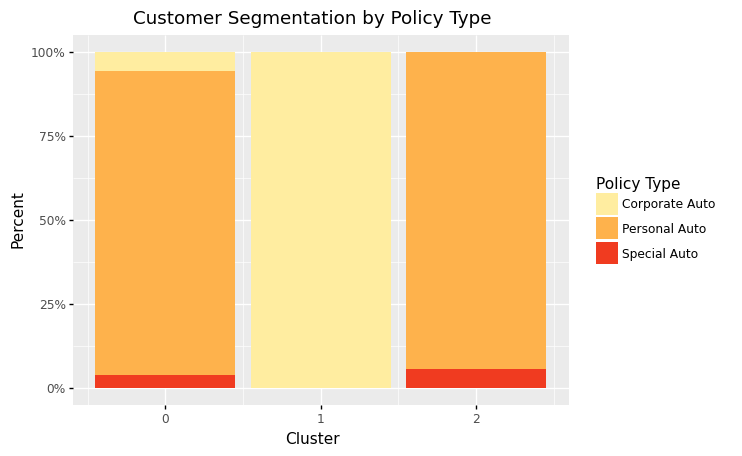

<ggplot: (8785180830570)>

In [62]:
ggplot(df, aes(x='Cluster', fill = 'Policy Type')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Policy Type') +\
scale_fill_brewer(palette = "YlOrRd", name = "Policy Type")

* Cluster 0: Personal
* Cluster 1: Corporate
* Cluster 2: Personal

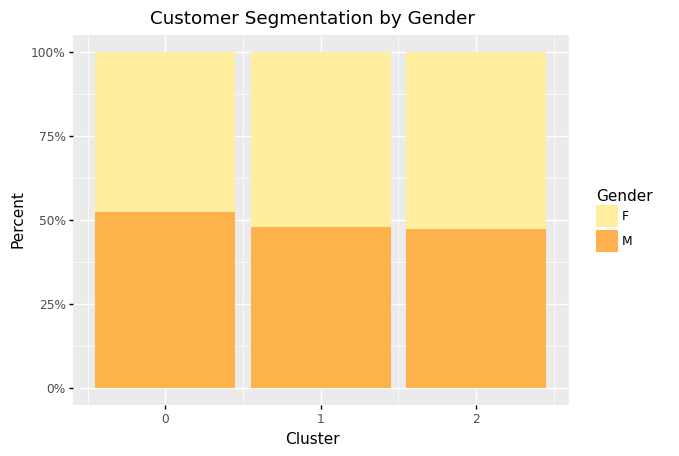

<ggplot: (8785184317410)>

In [63]:
ggplot(df, aes(x='Cluster', fill = 'Gender')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Gender') +\
scale_fill_brewer(palette = "YlOrRd", name = "Gender")

No difference among the clusters.

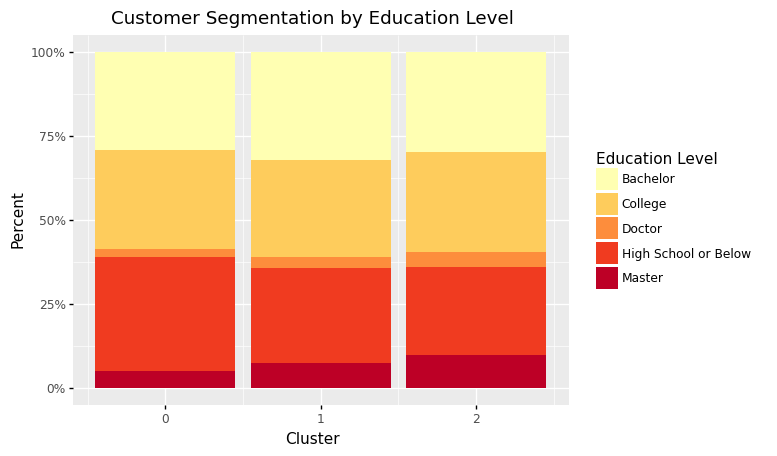

<ggplot: (8785164027724)>

In [64]:
ggplot(df, aes(x='Cluster', fill = 'Education')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Education Level') +\
scale_fill_brewer(palette = "YlOrRd", name = "Education Level")

* Cluster 0: High School or Below, College, Bachelor
* Cluster 1: Bachelor, High School or Below, College
* Cluster 2: College, Bachelor, High School or Bellow

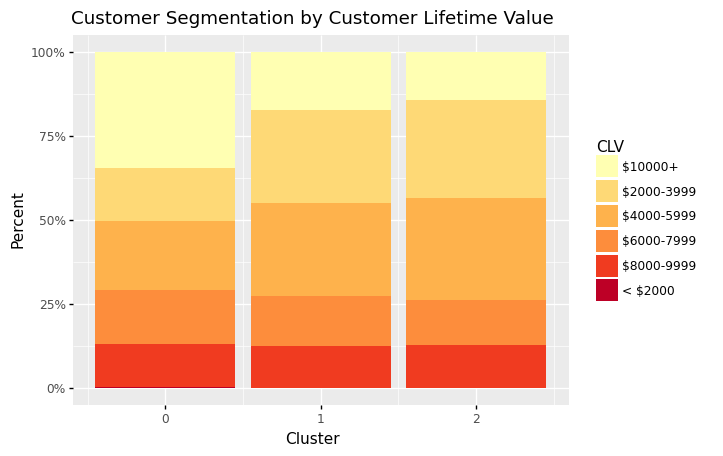

<ggplot: (8785146013817)>

In [65]:
ggplot(df, aes(x='Cluster', fill = 'CLVBin')) +\
geom_bar(position = "fill") + scale_y_continuous(labels = percent_format()) +\
xlab("Cluster") + ylab("Percent") + ggtitle('Customer Segmentation by Customer Lifetime Value') +\
scale_fill_brewer(palette = "YlOrRd", name = "CLV")

* Cluster 0: 10000+
* Cluster 1: 4000-5999, 2000-3999
* Cluster 2: 4000-5999, 2000-3999

### K-means Cluster Analysis

Five key characteristics distinctly defined each customer segment: Employment Status, Location, Marital Status, Annual Income and Total Claim Amount. Below is a summary description of each segment based on the results seen in the charts above.

***CLUSTER 1:***
Disabled, Medical Leave, Retired, Employed
Mostly Suburban
Income 15k-60k


***CLUSTER 2:*** 
Employed
Income: 45k or more
Low Accident Claims


***CLUSTER 3:*** 
Unemployed, Disabled, Medical Leave, Retired
Mostly Single
Suburban
Income: < 30k
High Accident Claim

These customer segment insights could be used to improve the renewal offer designs to be made more appealing to each customer segment.

## Decision Tree to predict Customer Segmentation, based on the cluster created before

A Decision Tree Classifier was built to grasp the characteristics of the data within the Clusters and create a model to predict in which segment a new customer belongs to. The accuracy will be measured to validate how well the model performs.

Encoding categorical features using an ordinal encoding scheme, the variables below were selected and then the encoding will be performed. This way the variables will have their values converted to integer values in an ordinal way.

In [66]:
# Encoding variables once again
columns = ['State', 'Customer Lifetime Value', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']

labelEncoder = LabelEncoder()
for column in df[columns]:
    df[column] = labelEncoder.fit_transform(df[column])

Splitting arrays into random train and test subsets. The test sample size for this project will be 30% of the total dataset size.

In [67]:
# Defining the data
X = df[['State', 'Customer Lifetime Value', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']]
y = df['Cluster']

Bulding a method to executre the decision tree, in it its possible to instance a Decision Tree Classifier model, with a depth of 5 and a default random_state. Then fitting the training subsets and doing the spelling with the test subset.

Also in the method, it builds a Confusion Matrix to evaluate the accuracy of a classification, and also classification report which gives a text report showing the main classification metrics.

In [113]:
decisions_tree = []

# function to execute decision tree classifier with size per parameter
def decisionTreeClassifier(size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size/100, random_state=42)
    decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
    decision_tree.fit(X_train, y_train)
    seg_pred = decision_tree.predict(X_test)
    decisions_tree.append(decision_tree)
    
    cm = confusion_matrix(seg_pred, y_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={"fontsize":12, 'fontweight':'bold'})
    print('\033[1m'+'Test size: ', size,'%'+'\033[0m')
    print('\033[1m'+'\nAccuracy score:'+'\033[0m',accuracy_score(seg_pred, y_test))
    print('\033[1m'+'\n\nClassification Report'+'\033[0m')
    print(classification_report(seg_pred, y_test))
    cross_val_score_tree = cross_validate(decision_tree, X_train, y_train, cv = 5, return_train_score=True)
    print('\033[1m'+"\n\nCross validation",size,"% train_score: "+'\033[0m',
          cross_val_score_tree['train_score'].mean(), " ")
    print('\033[1m'+"Cross validation",size,"% test_score: "+'\033[0m',
          cross_val_score_tree['test_score'].mean(), " ")
    print('\033[1m'+'\n\nConfusion Matrix:'+'\033[0m')      

Test size:  10 %

Accuracy score: 0.8785557986870897


Classification Report
              precision    recall  f1-score   support

          No       0.99      0.88      0.93       886
         Yes       0.17      0.75      0.27        28

    accuracy                           0.88       914
   macro avg       0.58      0.82      0.60       914
weighted avg       0.97      0.88      0.91       914



Cross validation 10 % train_score:  0.8786800486618004  
Cross validation 10 % test_score:  0.8732360097323602  


Confusion Matrix:


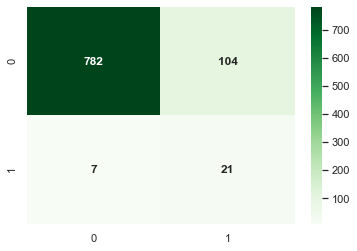

In [114]:
# decision tree classifier with test size of 10%
decisionTreeClassifier(10)

Test size:  20 %

Accuracy score: 0.8691844553913519


Classification Report
              precision    recall  f1-score   support

          No       0.99      0.87      0.93      1782
         Yes       0.14      0.80      0.23        45

    accuracy                           0.87      1827
   macro avg       0.56      0.84      0.58      1827
weighted avg       0.97      0.87      0.91      1827



Cross validation 20 % train_score:  0.880183331104274  
Cross validation 20 % test_score:  0.8750503515479062  


Confusion Matrix:


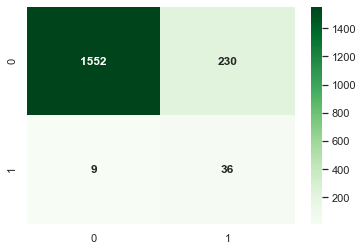

In [115]:
# decision tree classifier with test size of 20%
decisionTreeClassifier(20)

Test size:  30 %

Accuracy score: 0.8686610726012404


Classification Report
              precision    recall  f1-score   support

          No       0.99      0.87      0.93      2660
         Yes       0.16      0.80      0.27        81

    accuracy                           0.87      2741
   macro avg       0.58      0.84      0.60      2741
weighted avg       0.97      0.87      0.91      2741



Cross validation 30 % train_score:  0.8786955785414161  
Cross validation 30 % test_score:  0.8718898396022909  


Confusion Matrix:


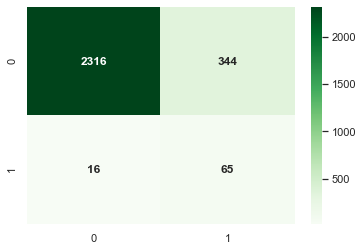

In [116]:
# decision tree classifier with test size of 30%
decisionTreeClassifier(30)

Test size:  40 %

Accuracy score: 0.8708264915161467


Classification Report
              precision    recall  f1-score   support

          No       0.99      0.87      0.93      3533
         Yes       0.18      0.79      0.29       121

    accuracy                           0.87      3654
   macro avg       0.58      0.83      0.61      3654
weighted avg       0.96      0.87      0.91      3654



Cross validation 40 % train_score:  0.8777828467153285  
Cross validation 40 % test_score:  0.869890510948905  


Confusion Matrix:


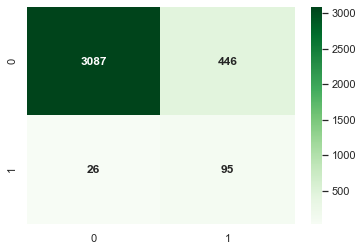

In [117]:
# decision tree classifier with test size of 40%
decisionTreeClassifier(40)

**Summary contained in the Classification Report:**

Precision: displays the number of objects selected correctly.

Recall: shows the number of objects that should have been selected and are currently selected.

F1-score: measures the weight of Recall and Precise, 1 means that Precise and Recall are equally important, and 0 to the contrary).

Support: displays the number of occurrences for each class.

The analysis shows the previous data exploration analysis, where the data is skewed to the positive reviews side as shown by the low Support counts in the report.

It is also possible to observe that Yes answers has small frequencies, which can be considered significant as shown by the low level of Precision and F1-score.

10% = 0.9310

20% = 0.9293

30% = 0.9303

40% = 0.9220

However, the accuracy shows that with a sample of 10% with a accurancy of 0.9310, 20% with a accurancy of  0.9293, 30% with a accurancy of 0.9303 and 40%  with a accurancy of 0.9220 of precision in predicting the Decision Tree Classification, what is considered good.

### COLOCAR O CROSS VALIDATION DE CADA UM AQUI EMBAIXO!!

After applying the model, its accuracy score was 93,17%. The model was able to predict correctly 86% of the values for Cluster 0, 99% of the values for Cluster 1 and 95% of the values for Cluster 2. The great majority of the predicted values belongs to Cluster 2, according to the Classification Report. Cross Validation was applied to evaluate how well the model can generalise the data and the results were 94,12% for the train set and 93,35% for the test set, which means the model performs quite well on the dataset and it is unlikely to be overfitting.

##### Feature Importances

Building a feature_importances_, this method shows the use of a forest of trees to evaluate the importance of features on a classification task. The bars are the feature importances of the tree.

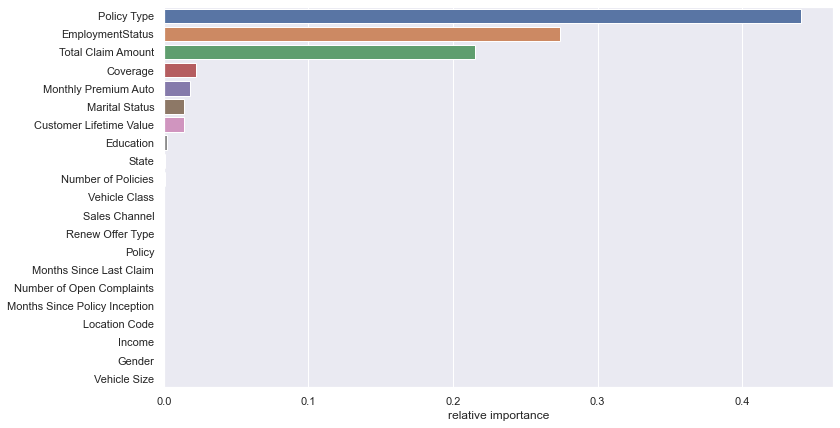

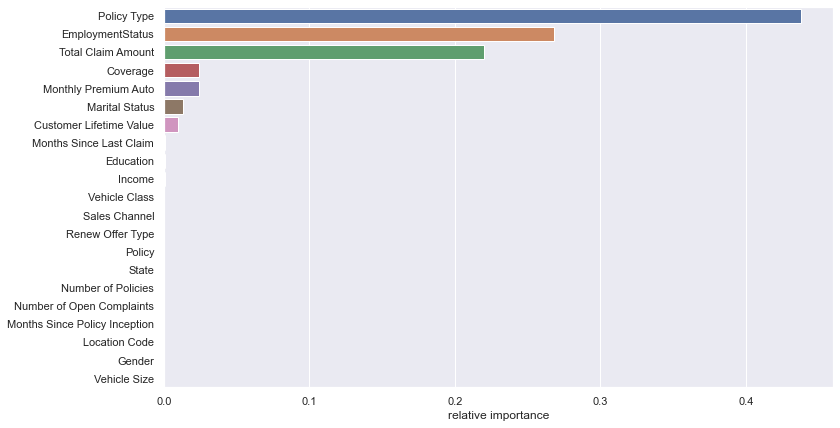

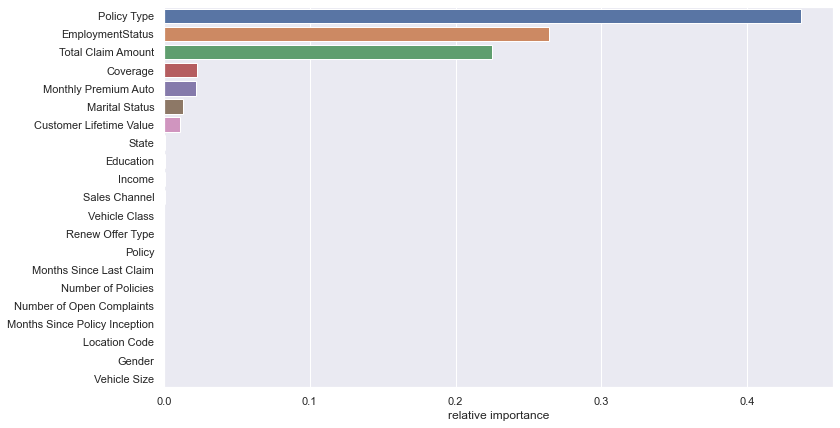

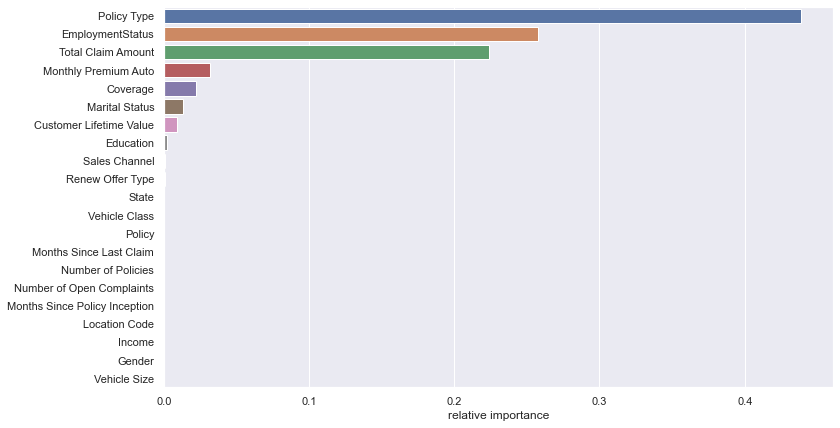

In [73]:
i = 0
while i < len(decisions_tree):
    feature_importances_tree = decisions_tree[i].feature_importances_.round(3)
    tree_rank = pd.Series(feature_importances_tree, index = X.columns).sort_values(ascending = False)
    i = i + 1
    plt.figure(figsize=(12,7))
    sns.barplot(x= tree_rank.values, y = tree_rank.index, palette='deep')
    plt.xlabel('relative importance')
    plt.show()

Using the feature_importances_ its possible to identify the features that most impacted the model. After getting the features, organising them and ploting them, it is possible to see that only 9 features impacted the model, with 3 of them being significantly important: Policy Type, Employment Status and Total Claim Amount. That confirms the description of the clusters created before, where it is possible to see the features being described.

## Predict Customer Responses to Offers

In [77]:
copy.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,IncomeBin,CLVBin,PremiumBin,ClaimBin
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,$45000-59999,$2000-3999,< $75,$250-499
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,< $15000,$6000-7999,$75-99,$1000+
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,$45000-59999,$10000+,$100-124,$500-749
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,< $15000,$6000-7999,$100-124,$500-749
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,$30000-44999,$2000-3999,< $75,< $250


### SVC Classifier

Building a Support Vector Classification (SVC), this classifier, in the case of binary classification, is trying to find the best hyper plane (a subspace whose dimension is one less than that of its ambient space) to divide data into classes, the basic goal is to maximize the margins, for instance, the distances between the hyper plane and the closest points from each class. When presented to new data points, the classifier assigns a specific class based on their position relative to the optimal hyper plane.

In [78]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'IncomeBin', 'CLVBin', 'PremiumBin',
       'ClaimBin', 'Cluster'],
      dtype='object')

In [79]:
# Encoding variables once again
columns = ['State', 'Customer Lifetime Value', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']

labelEncoder = LabelEncoder()
for column in df[columns]:
    df[column] = labelEncoder.fit_transform(df[column])

In [80]:
# Defining x and y
y = df['Response']
x = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']]

# Test and train split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [96]:
# function to execute svc with size per parameter
def svc(size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size/100, random_state=42)
    svc = SVC()
    svc.fit(x_train, y_train)
    svc_pred = svc.predict(x_test)
    
    cm = confusion_matrix(svc_pred, y_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12, 'fontweight':'bold'})
    
    print('\033[1m'+'Test size: ', size,'%'+'\033[0m')
    print('\033[1m'+'\nAccuracy score:'+'\033[0m',accuracy_score(svc_pred, y_test))
    
    cross_val_score_svc = cross_validate(svc, x_train, y_train, cv = 5, return_train_score=True)
    print('\033[1m'+"\n\nCross validation",size,"% train_score: "+'\033[0m', 
          cross_val_score_svc['train_score'].mean(), " ")
    print('\033[1m'+"Cross validation",size,"%  test_score: "+'\033[0m',
          cross_val_score_svc['test_score'].mean(), " ") 
    
    print('\n')
    print('\033[1m'+'\nClassification Report'+'\033[0m')
    print(classification_report(svc_pred, y_test))
    print('\033[1m'+'\nConfusion Matrix:'+'\033[0m')

Test size:  10 %

Accuracy score: 0.8632385120350109


Cross validation 10 % train_score:  0.8560827250608274  
Cross validation 10 %  test_score:  0.8560827250608272  



Classification Report
              precision    recall  f1-score   support

          No       1.00      0.86      0.93       914
         Yes       0.00      0.00      0.00         0

    accuracy                           0.86       914
   macro avg       0.50      0.43      0.46       914
weighted avg       1.00      0.86      0.93       914


Confusion Matrix:


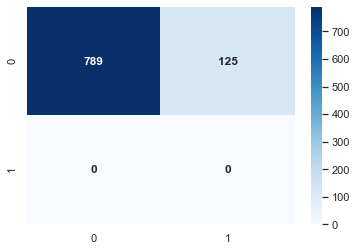

In [97]:
svc(10)

Test size:  20 %

Accuracy score: 0.8544061302681992


Cross validation 20 % train_score:  0.8573970225815902  
Cross validation 20 %  test_score:  0.8573971128970188  



Classification Report
              precision    recall  f1-score   support

          No       1.00      0.85      0.92      1827
         Yes       0.00      0.00      0.00         0

    accuracy                           0.85      1827
   macro avg       0.50      0.43      0.46      1827
weighted avg       1.00      0.85      0.92      1827


Confusion Matrix:


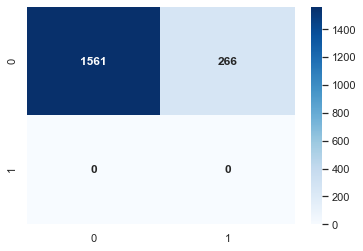

In [98]:
svc(20)

Test size:  30 %

Accuracy score: 0.8507843852608536


Cross validation 30 % train_score:  0.8593774473767409  
Cross validation 30 %  test_score:  0.85937749684625  



Classification Report
              precision    recall  f1-score   support

          No       1.00      0.85      0.92      2741
         Yes       0.00      0.00      0.00         0

    accuracy                           0.85      2741
   macro avg       0.50      0.43      0.46      2741
weighted avg       1.00      0.85      0.92      2741


Confusion Matrix:


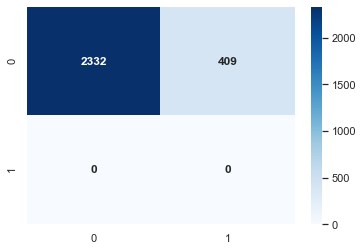

In [99]:
svc(30)

Test size:  40 %

Accuracy score: 0.8519430760810072


Cross validation 40 % train_score:  0.8600364963503649  
Cross validation 40 %  test_score:  0.8600364963503649  



Classification Report
              precision    recall  f1-score   support

          No       1.00      0.85      0.92      3654
         Yes       0.00      0.00      0.00         0

    accuracy                           0.85      3654
   macro avg       0.50      0.43      0.46      3654
weighted avg       1.00      0.85      0.92      3654


Confusion Matrix:


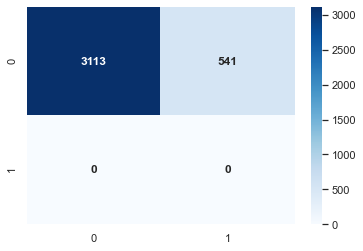

In [100]:
svc(40)

In [86]:
y.shape, x.shape

((9134,), (9134, 21))

### Random Forest

Random Forest Classifier is a estimator that builds multiples decision trees classifiers on different samples of the dataset to result the average of their predictions, this process allows to increase predictive accuracy and avoid over fitting.

In [111]:
randomForestClassifiers = []

# function to execute svc with size per parameter
def randomForestClassifier(size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size/100, random_state=42)
    randomForestClassifier = RandomForestClassifier()
    randomForestClassifier.fit(x_train, y_train)
    randomForestClassifier_pred = randomForestClassifier.predict(x_test)
    randomForestClassifiers.append(randomForestClassifier)
    
    cm = confusion_matrix(randomForestClassifier_pred, y_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12, 'fontweight':'bold'})
    
    print('\033[1m'+'Test size: ', size,'%'+'\033[0m')
    print('\033[1m'+'\nAccuracy score: '+'\033[0m',accuracy_score(randomForestClassifier_pred, y_test))
    
    cross_val_score_rfc = cross_validate(randomForestClassifier, x_train, y_train, cv = 5, return_train_score=True)
    print('\033[1m'+'Cross validation train_score'+'\033[0m', cross_val_score_rfc['train_score'].mean())
    print('\033[1m'+'Cross validation test_score'+'\033[0m', cross_val_score_rfc['test_score'].mean())
    
    print('\n') 
    print('\033[1m'+'\nClassification Report'+'\033[0m')
    print(classification_report(randomForestClassifier_pred, y_test))
    print('\033[1m'+'\nConfusion Matrix:'+'\033[0m')

Test size:  10 %

Accuracy score:  0.9967177242888403
Cross validation train_score 1.0
Cross validation test_score 0.9972019464720194



Classification Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       786
         Yes       1.00      0.98      0.99       128

    accuracy                           1.00       914
   macro avg       1.00      0.99      0.99       914
weighted avg       1.00      1.00      1.00       914


Confusion Matrix:


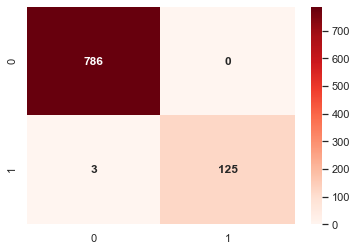

In [112]:
randomForestClassifier(10)

Test size:  20 %

Accuracy score:  0.9950738916256158
Cross validation train_score 1.0
Cross validation test_score 0.9938418020376577



Classification Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1560
         Yes       0.98      0.98      0.98       267

    accuracy                           1.00      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       1.00      1.00      1.00      1827


Confusion Matrix:


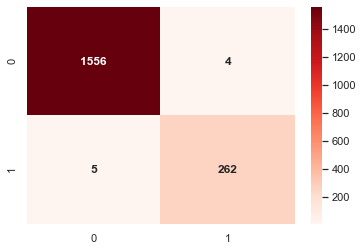

In [103]:
randomForestClassifier(20)

Test size:  30 %

Accuracy score:  0.9937978839839474
Cross validation train_score 1.0
Cross validation test_score 0.989363633805264



Classification Report
              precision    recall  f1-score   support

          No       1.00      0.99      1.00      2341
         Yes       0.97      0.99      0.98       400

    accuracy                           0.99      2741
   macro avg       0.98      0.99      0.99      2741
weighted avg       0.99      0.99      0.99      2741


Confusion Matrix:


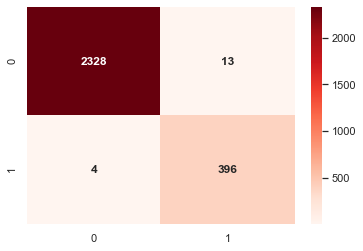

In [104]:
randomForestClassifier(30)

Test size:  40 %

Accuracy score:  0.9926108374384236
Cross validation train_score 1.0
Cross validation test_score 0.9832116788321169



Classification Report
              precision    recall  f1-score   support

          No       1.00      0.99      1.00      3128
         Yes       0.96      0.99      0.97       526

    accuracy                           0.99      3654
   macro avg       0.98      0.99      0.99      3654
weighted avg       0.99      0.99      0.99      3654


Confusion Matrix:


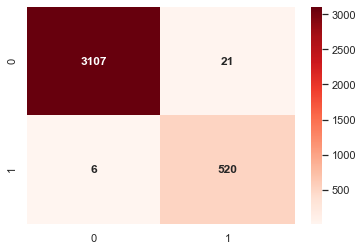

In [105]:
randomForestClassifier(40)

Random Forest Classifier got a score of 99.37% of accuracy based on the test targets.

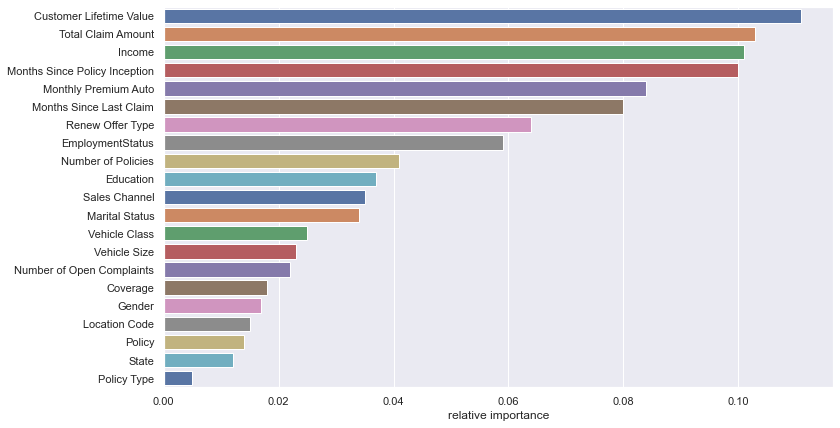

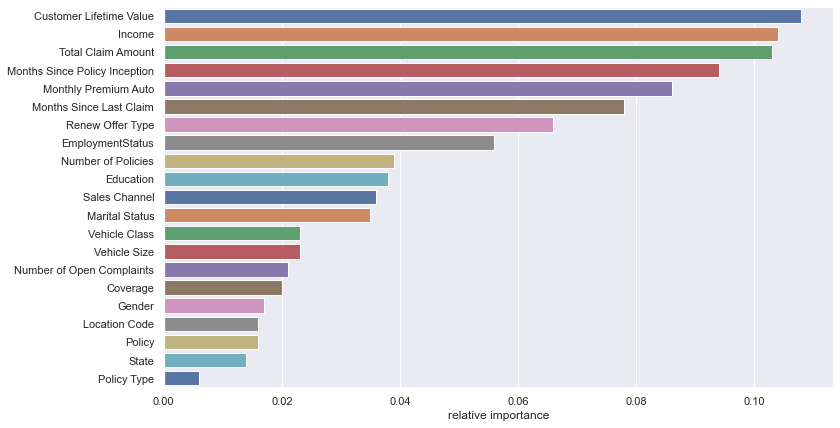

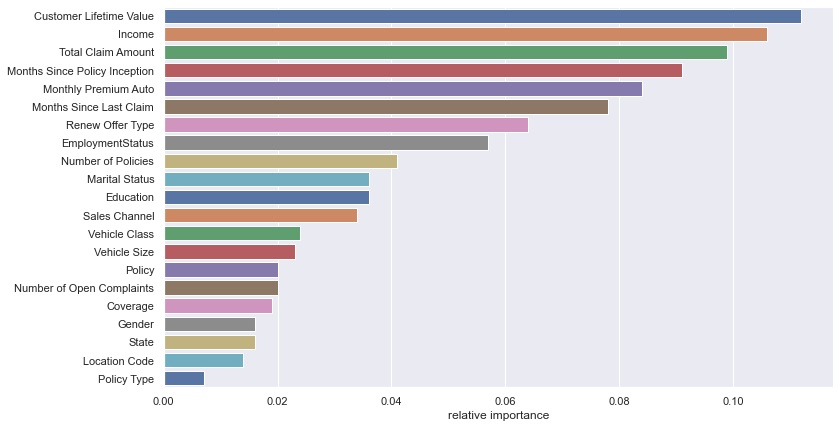

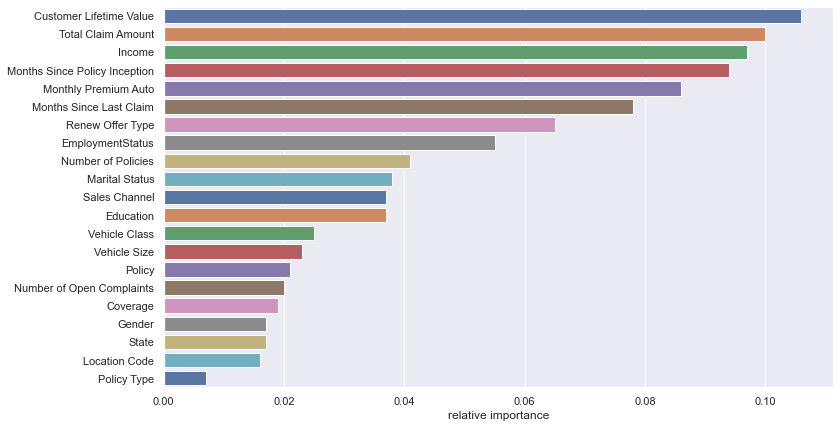

In [92]:
i = 0
while i < len(randomForestClassifiers):
    feature_importances = randomForestClassifiers[i].feature_importances_.round(3)
    series_rank = pd.Series(feature_importances, index = x.columns).sort_values(ascending = False)
    i = i + 1
    plt.figure(figsize=(12,7))
    sns.barplot(x= series_rank.values, y = series_rank.index, palette='deep')
    plt.xlabel('relative importance')
    plt.show()